**4장 – 모델 훈련**

_이 노트북은 4장에 있는 모든 샘플 코드와 연습문제 해답을 가지고 있습니다._

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/handson-ml2/blob/master/04_training_linear_models.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

# 설정

먼저 몇 개의 모듈을 임포트합니다. 맷플롯립 그래프를 인라인으로 출력하도록 만들고 그림을 저장하는 함수를 준비합니다. 또한 파이썬 버전이 3.5 이상인지 확인합니다(파이썬 2.x에서도 동작하지만 곧 지원이 중단되므로 파이썬 3을 사용하는 것이 좋습니다). 사이킷런 버전이 0.20 이상인지도 확인합니다.

In [47]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 선형 회귀

In [48]:
# 예제 데이터

# rand : 균등분포로 난수 발생(고르게)
# 0~1 난수, 100 by 1의 난수
# 2를 곱해서 0~2사이의 값 생성
# 샘플은 100개 특성은 1개
# x에 값을 부여하여 절편과 기울기를 만들고 난수로 y축을 조정
# randn : 표준분포(정규분포), 평균 0, 표준편차 1

import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

그림 저장: generated_data_plot


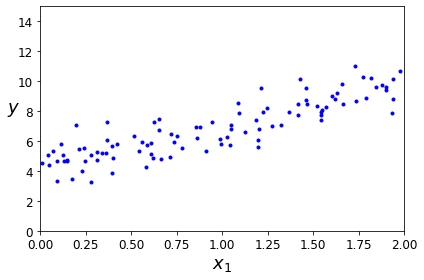

In [49]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

**식 4-4: 정규 방정식**

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

In [50]:
# 모든 샘플에 x0 = 1을 추가합니다. (절편) 100 by 2
# X_b.T : X^T
# np.linalg.inv : 역행렬
# X_b.T.dot(X_b) : (2,100)(100,2)=> (2,2)
# inv(X_b.T.dot(X_b)).dot(X_b.T): (2,2)(2,100) => (2,100)
# inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y): (2,100)(100,1)=>(2,1)

X_b = np.c_[np.ones((100, 1)), X]  
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [51]:
theta_best
# 세타, 절편

array([[4.21509616],
       [2.77011339]])

$\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$

In [52]:
# 새로운 샘플의 출력
# 0 ~ 2까지의 직선을 그려보기

X_new = np.array([[0], [2]])

# np.ones((2, 1)): 1로 채워진 2 *1 생성
# 절편(b)에 대한 가상 특성, 모든 샘플에 x0 = 1을 추가(행렬연산위해)
X_new_b = np.c_[np.ones((2, 1)), X_new] 

# y_predict : 0과 2에 대한 모델의 예측값

y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

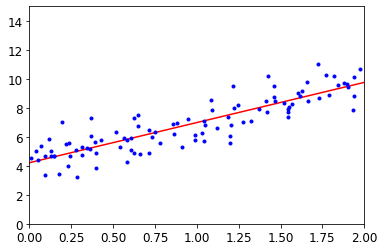

In [53]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# 주황색 선이 최소의 MSE를 보이는 선형 모델

책에 있는 그림은 범례와 축 레이블이 있는 그래프입니다:

그림 저장: linear_model_predictions_plot


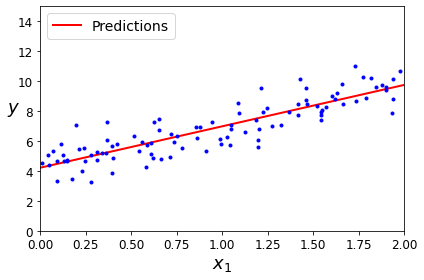

In [54]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

In [55]:
# 선형회귀모델

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
# lin_reg.intercept_: 절편, lin_reg.coef_ : 계수(가중치)

lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [56]:
# 새로운 데이터에 적용

lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

`LinearRegression` 클래스는 `scipy.linalg.lstsq()` 함수("least squares"의 약자)를 사용하므로 이 함수를 직접 사용할 수 있습니다:

In [57]:
# 싸이파이 lstsq() 함수를 사용하려면 scipy.linalg.lstsq(X_b, y)와 같이 씁니다.

# np.linalg.lstsq : SVD를 이용하여 lease square 구함
# rank : 행렬의 랭크
# svd(특이값 행렬)방식을 이용하여 계산
# rcond=1e-6 : rcond * 최대 특이값을 구해 이것보다 작은 singular value(특이값) 필터링
# 작은 값을 0으로 하여 유사 역행렬 구하기

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [58]:
# residuals : theta_best와 y의 차이의 제곱 (yhat-y)**2
residuals

array([80.6584564])

In [59]:
# 독립적인 행의 갯수
rank

2

In [60]:
# Singular values of X_b :특이값
s

array([14.37020392,  4.11961067])

이 함수는 $\mathbf{X}^+\mathbf{y}$을 계산합니다. $\mathbf{X}^{+}$는 $\mathbf{X}$의 _유사역행렬_ (pseudoinverse)입니다(Moore–Penrose 유사역행렬입니다). `np.linalg.pinv()`을 사용해서 유사역행렬을 직접 계산할 수 있습니다:

$\boldsymbol{\hat{\theta}} = \mathbf{X}^{-1}\hat{y}$

$\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$

In [61]:
# 유사역행렬(pinv) : 역행렬 근사값

np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

슬라이드보기

# 경사 하강법
## 배치 경사 하강법

**식 4-6: 비용 함수의 그레이디언트 벡터**

$
\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$

**식 4-7: 경사 하강법의 스텝**

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
$


In [62]:
# 미분이 경사도, 경사도를 옮겨가면서 최적의 값(세타 =오류가 가정 적은곳)을 찾는다

eta = 0.1  # 학습률, 작은 학습률
n_iterations = 1000
m = 100

# 정규분포에서 난수 발생
theta = np.random.randn(2,1)  # 랜덤 초기화

# 1000번 반복

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # mse 미분
    theta = theta - eta * gradients # 학습률을 곱해서 빼준다

In [63]:
theta

array([[4.21509616],
       [2.77011339]])

In [64]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [65]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:   # 초기 10번만 직선 그림
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

그림 저장: gradient_descent_plot


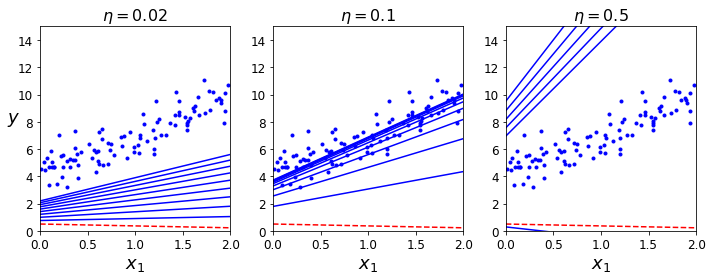

In [66]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

# 학습률(에타)=0.02일때 10번으로 적절한 직선을 찾기 어려움
# 학습률이 낮다, 최적점에 도달하는데 오래결린다

# 학습률(에타)=0.1일때 10번으로 적절한 직선을 찾음
# 학습률(에타)=0.5일때 스텝이 커지면서 발산
# 적절한 학습률 : 그리드서치 (반복횟수 제한)
# 반복횟수를 크게하고, 허용오차를 작게해서 변화가 없으면 멈추게


## 확률적 경사 하강법

In [67]:
# 한스텝에서 한개의 샘플을 선택하고 그 샘플에 대해 그레디언트를 계산
# theta_path_sgd : theta의 변화 보기 위한 리스트

theta_path_sgd = []
m = len(X_b)  # 첫번째 차원의 길이, 100개

np.random.seed(42)

그림 저장: sgd_plot


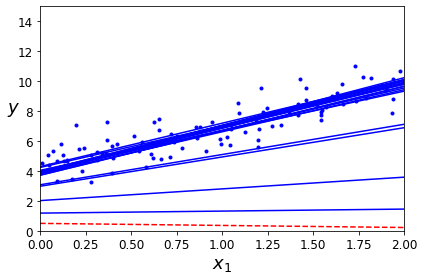

In [68]:
# 전체샘플 반복을 50번

n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)
# 0.1로 시작해서 값이 줄어든다.
# 첫번째 에타 : epoch =0, i=0, 5/50=0.1
# 에포크가 커질수로 분모가 커져서 학습률이 작아진다
# 마지막 : 49에포크, m=100개 샘플,i=99
# 5/(49*100+99+50) 


theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):                           # 전체샘플 m번 반복
        if epoch == 0 and i < 20:                    # 20번 반복
            y_predict = X_new_b.dot(theta)           # 책에는 없음
            style = "b-" if i > 0 else "r--"         # 책에는 없음
            plt.plot(X_new, y_predict, style)        # 책에는 없음
        random_index = np.random.randint(m)          # 0에서 m사이의 인덱스 랜덤 선택, 중복이 될수 있다
        xi = X_b[random_index:random_index+1]        # 경사하강법
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)   # 전체 샘플대상이 아니므로 2/m이 없음
        eta = learning_schedule(epoch * m + i)         # 학습할수록 에타값을 줄인다. 정교하게
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # 책에는 없음

plt.plot(X, y, "b.")                                 # 책에는 없음
plt.xlabel("$x_1$", fontsize=18)                     # 책에는 없음
plt.ylabel("$y$", rotation=0, fontsize=18)           # 책에는 없음
plt.axis([0, 2, 0, 15])                              # 책에는 없음
save_fig("sgd_plot")                                 # 책에는 없음
plt.show()                                           # 책에는 없음

# sklearn은 중복을 허용하지 않는 샘플링(모든 샘플이 한 에포크에서 기여할수 있도록)

In [69]:
theta
# 선형회귀와 비슷한 값

array([[4.21076011],
       [2.74856079]])

In [70]:
# 경사하강법
# max_iter=1000 : 에포크수
# penalty : 릿지나 라소 모델에서 사용
# tol=1e-3 : 결과에 차이가 없으면 (진전이 없으면) 멈추기
# eta0=0.1 : 초기 학습률
# learning_rate ='invscaling' : eta0/t**0.25
# learning_rate ='constant' ,'optimal','adaptive'

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel()) # 2차원 행렬을 1차원 배열로


SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [71]:
# 절편, 계수 출력
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

## 미니배치 경사 하강법

In [72]:
# 배치와 확률적의 중간
# 샘플수를 적당히 사용

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)  # 반복때 마다 섞어서 중복을 사용하지 않는 샘플링
    X_b_shuffled = X_b[shuffled_indices]  # 섞여 있는 인덱스 사용
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]  # 미니배치 사이즈만큼 넘파이슬라이싱으로 꺼내온다
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi) # 미니배치 사이즈만큼
        eta = learning_schedule(t)   # 에타 구하기
        theta = theta - eta * gradients  # 세타 구하기
        theta_path_mgd.append(theta)

In [73]:
# 결과보기

theta

array([[4.25214635],
       [2.7896408 ]])

In [74]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

그림 저장: gradient_descent_paths_plot


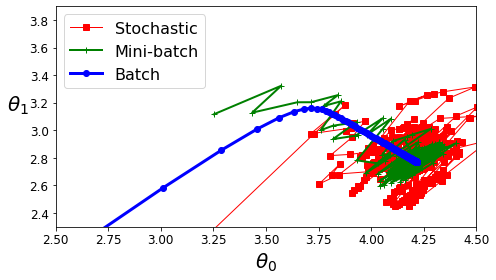

In [75]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

# 확률적경사하강보다 좌충우돌
# 미니배치는 좌충우돌이 적고 빠르다: 샘플의 일부로 조금씩 훈련
# 전체 데이처 사용하여 배치 부드럽다


# 다항 회귀

In [76]:
# 다항회귀 : 특성이 여러개
# polynomial regression

import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [77]:
# 균등분포로 100로 -3~3까지의 범위, 100 *1 사이즈

m = 100
X = 6 * np.random.rand(m, 1) - 3

# 이차방정식 1/2 x^2 + x+2 + 노이즈

y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

그림 저장: quadratic_data_plot


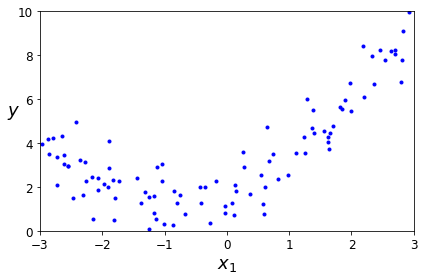

In [78]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()
# 그림그리기

In [79]:
#PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures

# 특성의 dgree 가 2까지 (기본값)
# include_bias=False : 편향특성 1 추가 => True (선형회귀모델은 편향 추가해줌)
# 선형모델에서 model.intercept_, model.coef_ 절편을 구함

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# 원래 X
X[0]

array([-0.75275929])

In [80]:
# 랜덤생성값, 제곱값

X_poly[0]

array([-0.75275929,  0.56664654])

In [81]:
#  어떤항이 만들어졌는지 확인

poly_features.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x0^2']

In [82]:
# degree = 3, a,b,c (차수가 3, 특성이 3개)
# 1, a,b,c,a2,b2,c2,a3,b3,c3, ab, bc,ca,a2b,ab2,abc2,...a3, b3...
# interaction_only=True : a,b.c와 교차항만 포함(ab,a2b)
 

In [83]:
# 선형회귀 훈련

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
# 선형회귀의 절편, 계수
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [84]:
#include_bias=True, 절편이 추가된다

poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly_features.fit_transform(X)
X_poly[0]
# 확인 1이 추가됨

array([ 1.        , -0.75275929,  0.56664654])

In [85]:
poly_features.get_feature_names()
# feature 살펴보기

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1', 'x0', 'x0^2']

In [86]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# 선형회귀의 절편, 계수
lin_reg.intercept_, lin_reg.coef_

# 첫번째항(절편) 무시됨. 따로 구함

(array([1.78134581]), array([[0.        , 0.93366893, 0.56456263]]))

그림 저장: quadratic_predictions_plot


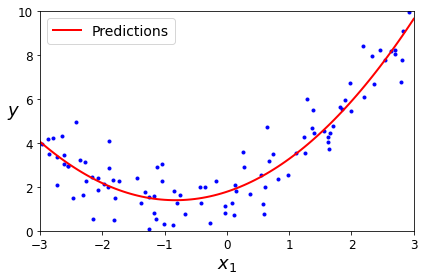

In [87]:

# -3~3 까지 100개 생성

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

[[ 5.80006972e-01  1.33734126e+02  1.16655848e+03 -1.44536159e+04
  -1.18556274e+05  6.39704397e+05  4.92997173e+06 -1.52482734e+07
  -1.12575106e+08  2.23673574e+08  1.60786572e+09 -2.17548676e+09
  -1.54032058e+10  1.46549931e+10  1.02832846e+11 -6.99939739e+10
  -4.86469523e+11  2.38641607e+11  1.62550252e+12 -5.74207116e+11
  -3.72160181e+12  9.35903701e+11  5.33924272e+12 -9.18107128e+11
  -3.42236558e+12  2.94729136e+11 -1.87784934e+12  4.20892609e+11
   3.70385946e+12 -4.48790010e+11  1.19763013e+12 -1.42104583e+11
  -3.07597833e+12  4.33145517e+11 -2.08091684e+12  9.36462671e+10
   1.68966233e+12 -4.35593770e+11  2.91551608e+12 -3.10030173e+11
   7.59913152e+11  3.21710255e+11 -1.91141109e+12  6.01913282e+11
  -2.55937484e+12  2.80562320e+11 -9.94042367e+11 -4.34285874e+11
   1.17906571e+12 -8.26308499e+11  2.28540689e+12 -5.39999399e+11
   1.79210005e+12  1.57173341e+11  2.93428680e+11  7.71728489e+11
  -1.23697764e+12  1.00676660e+12 -1.95926121e+12  6.23423854e+11
  -1.67798

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


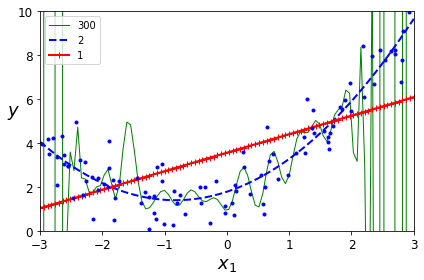

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# dgree를 300, 2, 1로 지정
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler() # 스케일러
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([    #여러개의 변환기 파이프라인으로 묶기
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg), 
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
#   coef 출력해보기 : 300차원으로 큰값 존재 (-150승)
    print(polynomial_regression['lin_reg'].coef_)

#   feature name 출력
    print(polynomial_regression['poly_features'].get_feature_names())
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

In [89]:
# 300일때 복잡한 모양의 선형회귀


# 학습 곡선

In [90]:
# 과대적합, 과소적합 살펴보기 Learning curve

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  # 100개를 훈련과 테스트 8:2
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):  # 1~80개로 늘려가면서 실험
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) # MSE (훈련세트)
        val_errors.append(mean_squared_error(y_val, y_val_predict)) # MSE (검증세트)

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # 책에는 없음
    plt.xlabel("Training set size", fontsize=14) # 책에는 없음
    plt.ylabel("RMSE", fontsize=14)              # 책에는 없음

그림 저장: underfitting_learning_curves_plot


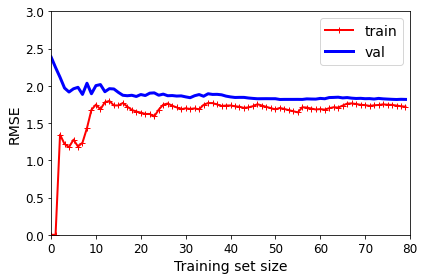

In [91]:
#  선형회귀
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # 책에는 없음
save_fig("underfitting_learning_curves_plot")   # 책에는 없음
plt.show()  

# 훈련데이터가 1개일때는 오차가 없다가 점차로 증가  
# 너무일찍 가까와지고, 훈련과 검증의 차이가 거의 없다    
# 과소적합                        

그림 저장: learning_curves_plot


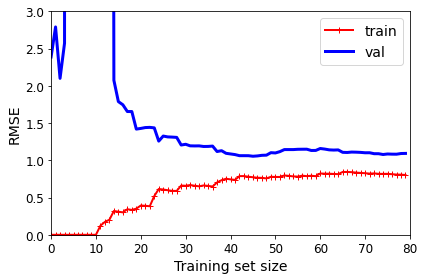

In [92]:
# 과소적합을 줄이기 위해 다항특성을 넣는다
# 10차까지
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # 책에는 없음
save_fig("learning_curves_plot")  # 책에는 없음
plt.show()                        # 책에는 없음

# mse 가 내려감, 훈련과 검증이 만나는 점이 늦어지고 간격이 있다

# 규제가 있는 선형 모델

## 릿지 회귀

In [93]:
# 데이터셋 생성
# 20개 0~1의 수에 3곱하기
# y : 0 ~ 2.5 + noise
# 0 ~ 3 까지 100개의 점

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)



**식 4-8: 릿지 회귀의 비용 함수**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \dfrac{1}{2}\sum\limits_{i=1}^{n}{\theta_i}^2
$

In [94]:
# 특성의 가중치를 제곱해서 합 L2 노름
# 알파: 규제항의 정도
# 크게하면 가중치가 작아진다. 규제가 커진다
# 작게하면 가중치가 커진다
# 1/2 : 미분시 없어지게 하려고
# 모델 훈련시만 규제사용하고 평가시에는 MSE만 사용

In [95]:
# 릿지(Ridge) import
#  solver = cholesky (행렬분해방법)

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])  # 1.5를 예측

array([[1.55071465]])

In [96]:
# solver=sag : stochastic average gradient (경사하강법과 유사)
# saga : 데이터셋이 더 클때 사용
# max_iter = 1000 : 반복수(기본값)

ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
# 1.5에 대해 예측
ridge_reg.predict([[1.5]])

array([[1.5507201]])

그림 저장: ridge_regression_plot


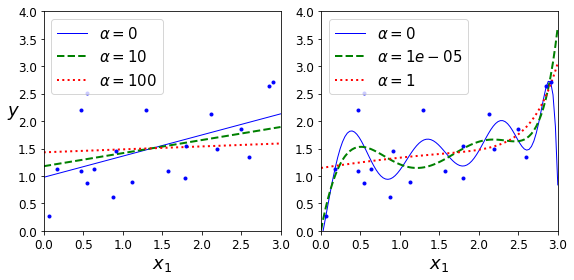

In [97]:
# 알파에 따른 변화

from sklearn.linear_model import Ridge

# 특성의 scale을 표준화 (규제가 있는 모델 특히 중요)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
      # alpha=0이면 선형모델, 0보다 크면 주어진 모델
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121) # plt.subplot(1,2,1) : col,row,index
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)

# 다항특성 추가
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

# (left)알파 0 : 선형회귀모델, alpha 10, 100 : ridge
# (right) alpha = 0 : 다항특성의 선형
# alpha를 작게하면 모델의 복잡도가 낮아진다 
# alpha를 1 했을때 선형회귀처럼 직선으로


**노트**: 향후 버전이 바뀌더라도 동일한 결과를 만들기 위해 사이킷런 0.21 버전의 기본값인 `max_iter=1000`과 `tol=1e-3`으로 지정합니다.

In [98]:
#  penalty="l2" : 패널치 l2 노름 사용, 릿지모델과 비슷한 손실함수 

sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

**식 4-10: 라쏘 회귀의 비용 함수**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right|
$

## 라쏘 회귀

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


그림 저장: lasso_regression_plot


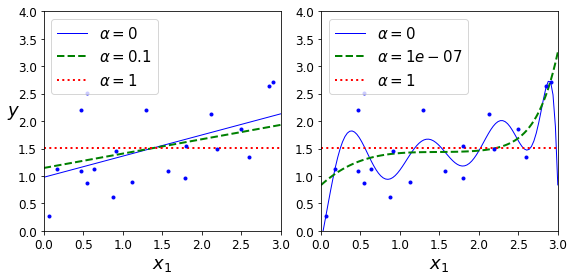

In [99]:
# 비용함수에 가중치의 절대값의 합 사용, l1 노름 
# theta를 0으로 만들수 있다

from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

# (left) alpha =0 이면 선형, alpha가 커지면 수평
#(right) alpha가 커지면 규제가 많이되어서 절편만 남은것처럼 된다

In [100]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## 엘라스틱넷

**식 4-12: 엘라스틱넷 비용 함수**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right| + \dfrac{1 - r}{2} \alpha \sum\limits_{i=1}^{n}{{\theta_i}^2}
$

In [101]:
# 비용함수 mse + l1+ l2
from sklearn.linear_model import ElasticNet

# l1_ratio(r)=1 : ㅣ2 노름 파트가 0이되어 랏소모델이 된다
# l1_ratio(r)=0 : ㅣ1 노름 파트가 0이되어 릿지모델과 비슷 (훈련방식이 다름)
# l2 norm을 사용하는 릿지, elasticnet 이 선호된다

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## 조기 종료

In [102]:
# 훈련세트와 검정세트의 결과가 가까와졌을때 종료
# 검증세트 결과가 더 나빠지려고 할때 종료

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [103]:
from copy import deepcopy

# 특성변환을 한번에 처리하는 파이프라인

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# SGDRegressor

# max_iter=1 : 에포크 1번만 
# penalty=None : 패널티 사용 안함
# warm_start=True : 이전결과 기억
# learning_rate="constant", eta0=0.0005 : 학습률 상수로 지정

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    # validation error 저장
    val_error = mean_squared_error(y_val, y_val_predict)
    # 최소에러 저장 minimum_val_error
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

그래프를 그립니다:

그림 저장: early_stopping_plot


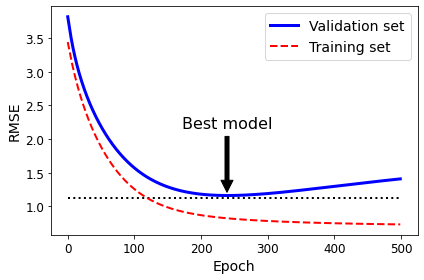

In [104]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    # 그래프위해 저장
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

# 검증세트 값이 상승하는 점 

In [105]:
# 최상의 에포크, 최소에러, 최상의 모델 출력
best_epoch, minimum_val_error, best_model

(239,
 1.3513110512453865,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

In [106]:
sgd_reg = SGDRegressor(penalty=None, learning_rate="constant", eta0=0.0005, random_state=42,
                       early_stopping=True)

#  early_stopping=True : 조기종료, 성능이 좋아지지 않을때 종료 ( 훈련데이터의 일부로 검증)
#  tol로 지정가능, 0.001이상 5회 연속 좋아지지 않으면 중단

In [107]:
sgd_reg.fit(X_train_poly_scaled, y_train)
y_val_predict = sgd_reg.predict(X_val_poly_scaled)
mean_squared_error(y_val,y_val_predict), sgd_reg.n_iter_
# MSE 계산, 293 에포크에서 중단

(0.8987688364730185, 293)

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [109]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

그림 저장: lasso_vs_ridge_plot


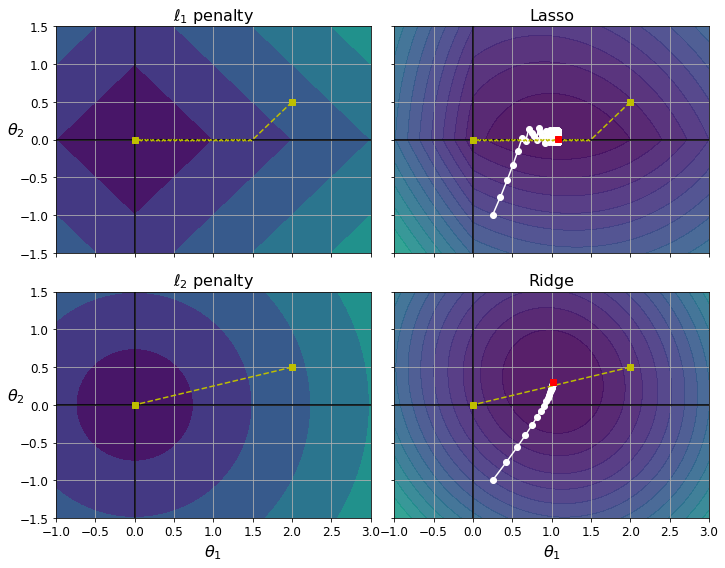

In [110]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

save_fig("lasso_vs_ridge_plot")
plt.show()

#진한색이 손실이 낮은지점, 밝은색이 손실이 높은 지점
# l1 : 오른쪽에서 시작해서 경사가 빠른 방향으로 theta2로
# l2 : 동심원을 따라 바로 최저값으로
# 라쏘 : 아래에서 시작. 진동하면서 빨간점으로
# 규제가 주어지면 빨간점이 왼쪽으로 이동(규제로 가중치가 작아진다)
# 릿지 : 최적점을 바로 찾아간다. L2 규제

# 로지스틱 회귀

## 결정 경계

그림 저장: logistic_function_plot


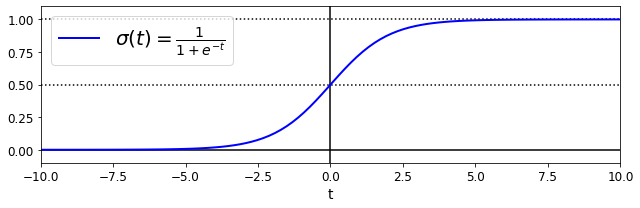

In [111]:
# 로지스틱회귀 : 분류모델
# 방정식 계산 결과가 임계값을 기준으로 임계값보다 크면 양성, 아니면 음성
# predict_proba 로 확률값 제공
# 로지스틱함수(로짓함수, 시그모이드함수) : -inf~ +inf를 0~1 사이값으로 변환
# 확률로 사용가능
# 선형모델과 유사하지만 결과 생성시 로짓함수로 분류결과 결정

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

# 시그모이드 함수

**식 4-16: 하나의 훈련 샘플에 대한 비용 함수**

$
c(\boldsymbol{\theta}) =
\begin{cases}
  -\log(\hat{p}) & \text{if } y = 1, \\
  -\log(1 - \hat{p}) & \text{if } y = 0.
\end{cases}
$


**식 4-17: 로지스틱 회귀 비용 함수(로그 손실)**

$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$


**식 4-18: 로지스틱 비용 함수의 편도 함수**

$
\dfrac{\partial}{\partial \theta_j} \text{J}(\boldsymbol{\theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}\left(\mathbf{\sigma(\boldsymbol{\theta}}^T \mathbf{x}^{(i)}) - y^{(i)}\right)\, x_j^{(i)}
$

In [120]:
# 분류모델의 목표 : 정확도 (갯수) 
# 분류를 위한 비용함수
# log 손실함수 1=> 0, 0에 가까우면 =>-inf
# p^ : 시그모이드를 통과한 값
# 양성클래스: p^이 0에 가까우면 (잘못맞추면) log(p^)이 -inf, -log(p^)가 큰양수가 된다
# p^이 1에 가까우면(제대로 맞추면) log(p^)는 0에 가까운 - 값.-log(p^)는 작은 양수값 
# 잘 맞추면 작은 손실값, 못맞추면 큰 손실값
# 음성클래스: p^이 1에 가까우면 잘못예측 log(1-p^)=>큰 음수 => -log(1-p^)큰양수
# 식 4-17 : 음성과 양성일때를 합쳐서 로지스틱 회귀 비용함수
# y=1(양성클래스)이면 앞의 항만 남는다
# y=0(음성클래스)이면 뒤의 항만 남는다
# 4-18 : 4-17을 미분 => sigma(mse)



In [121]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [122]:
# data : 입력데이터
# target: label
# target_names : 0,1,2
# feature_names : 너비, 길이
# file_name : 경로

In [124]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [125]:
#클래스별 인스턴스 갯수 출력

np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [126]:
# 이진분류
# 클래스가 2일때 양성 그외에는 음성
# 특성 1개만 사용

X = iris["data"][:, 3:]  # 꽃잎 너비(4개 특성중 마지막) 슬라이싱으로 2차원배열로 리턴
y = (iris["target"] == 2).astype(int)  # Iris virginica이면 1 아니면 0

**노트**: 향후 버전이 바뀌더라도 동일한 결과를 만들기 위해 사이킷런 0.22 버전의 기본값인 `solver="lbfgs"`로 지정합니다.

In [127]:
# 로지스틱회귀
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42) # 모델만들기, solver 기본
log_reg.fit(X, y) # fit모델 호출

LogisticRegression(random_state=42)

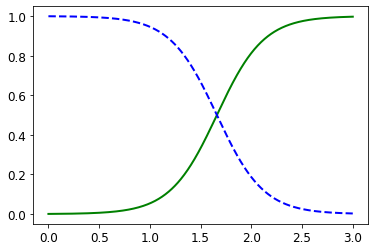

In [ ]:
# 전체데이터 사용하여 로지스틱 회귀의 동작 살펴보기
# 0~3까지 1000개의 구간으로 나누어 확률예측

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

# pridict_proba

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")  # 양성클래스
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica") # 음성클래스

# 꽃잎 너비가 커지면 양성 확률이 높아진다
# 꽃잎 너비가 작아지면 음성 확률이 높아진다

책에 실린 그림은 조금 더 예쁘게 꾸몄습니다:

그림 저장: logistic_regression_plot


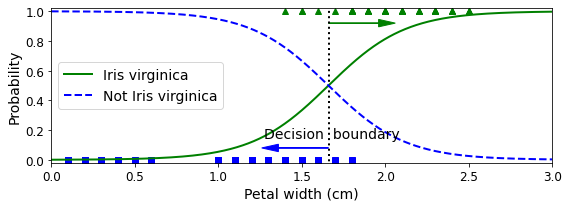

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]  # decision boundary

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

# 꽃잎너비 1.6 근처에서 오른쪽이면 양성 확률이 높아짐; 확률 0.5


In [ ]:
# 결정경계
decision_boundary

array([1.66066066])

In [129]:
# 예측
log_reg.predict([[1.7], [1.5]])
# 1.7은 1.6하고 비교하여 양성

array([1, 0])

## 소프트맥스 회귀

그림 저장: logistic_regression_contour_plot


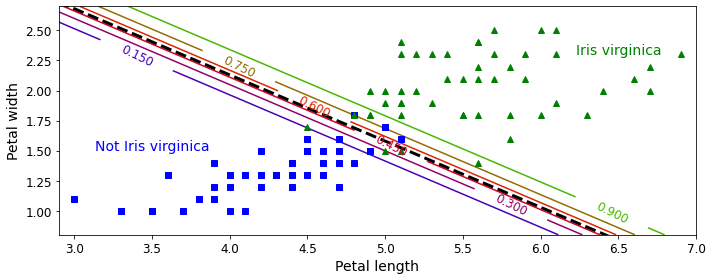

In [130]:
# 길이와 너비로 특징 2개로 예측

from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

# meshgrid
# meshgrid : 각 축에 대한 포인트 입력-> 포인트가 교차하는 좌표 계산
#x0 : 500구간이 200번 반복
#x1 : 200구간이 500번 반복

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),  # 2.9~7까지 500구간이 y축으로 200번
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
# 새로운 X 데이터 생성
X_new = np.c_[x0.ravel(), x1.ravel()]

# y_proba그리기
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


# 결정함수 값 = coef_[0][0]*길이 + coef_[0][1]* 너비 + 절편
# boundary : 너비(y)를 구하기 위해 너비만 남기고 왼쪽을 이동

left_right = np.array([2.9, 7]) # x축, 길이
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

# 결정경계 출력
# 화면에 수직인 확률축
# 등고선 구하기

In [ ]:
# p^:클래스마다 결정함수에 지수 적용 /클래스마다 결정함수에 지수를 적용한 합
# p^이 가장큰 클래스가 타겟 : 클래스 예측 확률

**식 4-20: 소프트맥스 함수**

$
\hat{p}_k = \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}
$



In [131]:
# 4-22 : 크로스 엔트로피 (로지스틱 손실(이진크로스엔트로피)과 비슷)
# K는 클래스 갯수
# 타깃클래스(y1)이 1이면 -log(p1^)만 남고, log(p2^), log(p3^)는 사라진다

#  4-23 : 로지스틱, mse 미분과 동일

**식 4-22: 크로스 엔트로피 비용 함수**

$
J(\boldsymbol{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}
$

**식 4-23: 클래스 k에 대한 크로스 엔트로피의 그레이디언트 벡터**

$
\nabla_{\boldsymbol{\theta}^{(k)}} \, J(\boldsymbol{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}
$

In [133]:
# 다중분류: 소프트맥스, 다중분류 로지스틱
# 결정경계그리기 위해 2개의 특성 사용

X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

# multi_class="multinomial : 다중분류

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

그림 저장: softmax_regression_contour_plot


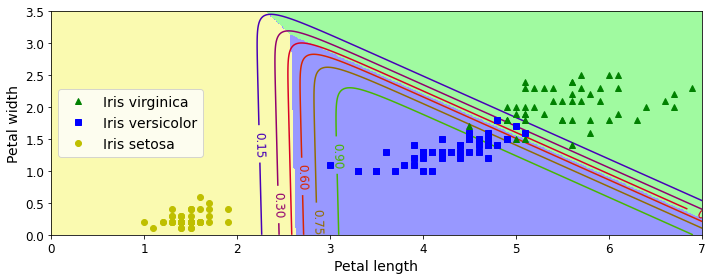

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

# softmax_reg.predict_proba : 확률값
y_proba = softmax_reg.predict_proba(X_new)

# softmax_reg.predict : 예측값
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

# 등고선 그리기
# contourf : 3개의 색깔로 (예측값으로)

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

# 세개의 클래스로 분류

In [ ]:
# 예측
softmax_reg.predict([[5, 2]])
# 3번째 클래스로 예측

array([2])

In [ ]:
# 확률값 출력
softmax_reg.predict_proba([[5, 2]])
# 3번째가 94퍼


array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

# 연습문제 해답

## 1. to 11.

부록 A를 참고하세요.

## 12. 조기 종료를 사용한 배치 경사 하강법으로 소프트맥스 회귀 구현하기
(사이킷런을 사용하지 않고)

먼저 데이터를 로드합니다. 앞서 사용했던 Iris 데이터셋을 재사용하겠습니다.

In [ ]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 넓이
y = iris["target"]

모든 샘플에 편향을 추가합니다 ($x_0 = 1$):

In [ ]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

결과를 일정하게 유지하기 위해 랜덤 시드를 지정합니다:

In [ ]:
np.random.seed(2042)

데이터셋을 훈련 세트, 검증 세트, 테스트 세트로 나누는 가장 쉬운 방법은 사이킷런의 `train_test_split()` 함수를 사용하는 것입니다. 하지만 이 연습문제의 목적은 직접 만들어 보면서 알고리즘을 이해하는 것이므로 다음과 같이 수동으로 나누어 보겠습니다:

In [ ]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

타깃은 클래스 인덱스(0, 1 그리고 2)이지만 소프트맥스 회귀 모델을 훈련시키기 위해 필요한 것은 타깃 클래스의 확률입니다. 각 샘플에서 확률이 1인 타깃 클래스를 제외한 다른 클래스의 확률은 0입니다(다른 말로하면 주어진 샘플에 대한 클래스 확률이 원-핫 벡터입니다). 클래스 인덱스를 원-핫 벡터로 바꾸는 간단한 함수를 작성하겠습니다:

In [ ]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

10개 샘플만 넣어 이 함수를 테스트해 보죠:

In [ ]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [ ]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

잘 되네요, 이제 훈련 세트와 테스트 세트의 타깃 클래스 확률을 담은 행렬을 만들겠습니다:

In [ ]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

이제 소프트맥스 함수를 만듭니다. 다음 공식을 참고하세요:

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [ ]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

훈련을 위한 준비를 거의 마쳤습니다. 입력과 출력의 개수를 정의합니다:

In [ ]:
n_inputs = X_train.shape[1] # == 3 (특성 2개와 편향)
n_outputs = len(np.unique(y_train))   # == 3 (3개의 붓꽃 클래스)

이제 좀 복잡한 훈련 파트입니다! 이론적으로는 간단합니다. 그냥 수학 공식을 파이썬 코드로 바꾸기만 하면 됩니다. 하지만 실제로는 꽤 까다로운 면이 있습니다. 특히, 항이나 인덱스의 순서가 뒤섞이기 쉽습니다. 제대로 작동할 것처럼 코드를 작성했더라도 실제 제대로 계산하지 못합니다. 확실하지 않을 때는 각 항의 크기를 기록하고 이에 상응하는 코드가 같은 크기를 만드는지 확인합니다. 각 항을 독립적으로 평가해서 출력해 보는 것도 좋습니다. 사실 사이킷런에 이미 잘 구현되어 있기 때문에 이렇게 할 필요는 없습니다. 하지만 직접 만들어 보면 어떻게 작동하는지 이해하는데 도움이 됩니다.

구현할 공식은 비용함수입니다:

$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

그리고 그레이디언트 공식입니다:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

$\hat{p}_k^{(i)} = 0$이면 $\log\left(\hat{p}_k^{(i)}\right)$를 계산할 수 없습니다. `nan` 값을 피하기 위해 $\log\left(\hat{p}_k^{(i)}\right)$에 아주 작은 값 $\epsilon$을 추가하겠습니다.

In [ ]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693314
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.47292289721922487
3500 0.44824244188957774
4000 0.4278651093928793
4500 0.41060071429187134
5000 0.3956780375390374


바로 이겁니다! 소프트맥스 모델을 훈련시켰습니다. 모델 파라미터를 확인해 보겠습니다:

In [ ]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

검증 세트에 대한 예측과 정확도를 확인해 보겠습니다:

In [ ]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

와우, 이 모델이 매우 잘 작동하는 것 같습니다. 연습을 위해서 $\ell_2$ 규제를 조금 추가해 보겠습니다. 다음 코드는 위와 거의 동일하지만 손실에 $\ell_2$ 페널티가 추가되었고 그래디언트에도 항이 추가되었습니다(`Theta`의 첫 번째 원소는 편향이므로 규제하지 않습니다). 학습률 `eta`도 증가시켜 보겠습니다.

In [ ]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # 규제 하이퍼파라미터

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
        loss = xentropy_loss + alpha * l2_loss
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 6.629842469083912
500 0.5339667976629505
1000 0.503640075014894
1500 0.4946891059460321
2000 0.4912968418075477
2500 0.48989924700933296
3000 0.4892990598451198
3500 0.489035124439786
4000 0.4889173621830818
4500 0.4888643337449303
5000 0.48884031207388184


추가된 $\ell_2$ 페널티 때문에 이전보다 손실이 조금 커보이지만 더 잘 작동하는 모델이 되었을까요? 확인해 보죠:

In [ ]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

와우, 완벽한 정확도네요! 운이 좋은 검증 세트일지 모르지만 잘 된 것은 맞습니다.

이제 조기 종료를 추가해 보죠. 이렇게 하려면 매 반복에서 검증 세트에 대한 손실을 계산해서 오차가 증가하기 시작할 때 멈춰야 합니다.

In [ ]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # 규제 하이퍼파라미터
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "조기 종료!")
        break

0 4.7096017363419875
500 0.5739711987633518
1000 0.5435638529109127
1500 0.5355752782580262
2000 0.5331959249285544
2500 0.5325946767399383
2765 0.5325460966791898
2766 0.5325460971327977 조기 종료!


In [ ]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

여전히 완벽하지만 더 빠릅니다.

이제 전체 데이터셋에 대한 모델의 예측을 그래프로 나타내 보겠습니다:

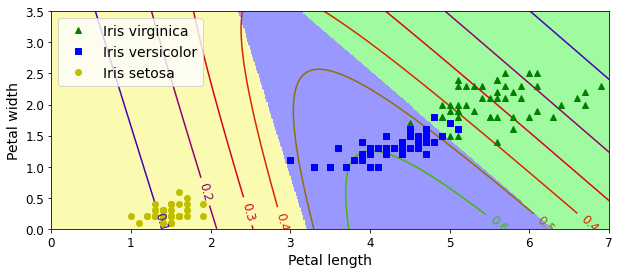

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

이제 테스트 세트에 대한 모델의 최종 정확도를 측정해 보겠습니다:

In [ ]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333

완벽했던 최종 모델의 성능이 조금 떨어졌습니다. 이런 차이는 데이터셋이 작기 때문일 것입니다. 훈련 세트와 검증 세트, 테스트 세트를 어떻게 샘플링했는지에 따라 매우 다른 결과를 얻을 수 있습니다. 몇 번 랜덤 시드를 바꾸고 이 코드를 다시 실행해 보면 결과가 달라지는 것을 확인할 수 있습니다.